# Plot Individual OLR Hysteresis Loops and All Loops with Individual Loops Overlayed

### Packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from IPython.display import clear_output
import matplotlib.ticker as mtick

### Auxiliary Functions

In [4]:
def progress(progress):
    '''
    A loading bar 
    
    Parameters:
        Float in range 0 to 1 as fractional progress
        
    Returns:
        None, prints loading bar
    '''
    
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

### Import Data

In [6]:
path = './Data/'

heights = xr.open_dataset(path + 'heights_measured.nc')
ts_2m = xr.open_dataset(path + 'ts_2m.nc', decode_times=False)
temp = xr.open_dataset(path + 'temp.nc', decode_times=False)
olrs_ltmm = xr.open_dataset(path + 'olrs_ltmm.nc', decode_times=False)

lats = temp.lat.values
lons = temp.lon.values
lon_long = temp.lon.values

### Functions for Plotting Individual Loops

In [7]:
def plot(i_raw, j_raw):
    i = np.where(lats == i_raw)[0][0]
    j = np.where(lons == j_raw)[0][0]

    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6,5))

    month_list = np.arange(1,13)
    lc1 = '#7d7d7d'

    cplot = axs.scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis')
    axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=lc1, label='Calculated OLR')
    axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c=lc1)
    
    nam = str('Lat: %s, Lon: %s' % (i_raw, j_raw))
    axs.set_title(nam)
    
    axs.set_xlabel("Near-surface Temperature (K)")
    axs.set_ylabel("OLR (W/m$^2$)")
    
    cbar = fig.colorbar(cplot, fraction=0.03,pad=0.03,shrink=1)
    cbar.ax.set_title(r'Month',fontsize=16,y=1.04,x=2.5)
    
    #plt.savefig('./Figures/%s %s.png' % (i_raw, j_raw), bbox_inches='tight')

def get_height(lat_val, lon_val):
    h = heights.sel(lat=lat_val, lon=lon_val).height.values[()]
    print("Average Hysteresis: %.2f W m^-2" % h)

### Plotting Individual Loops

Average Hysteresis: 7.43 W m^-2


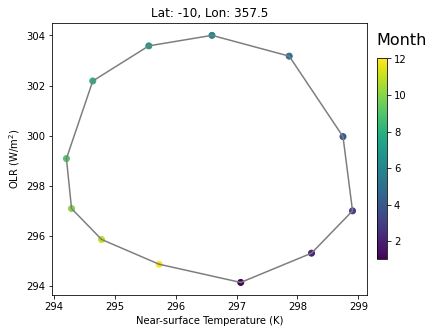

In [8]:
plot(-10,357.5)
get_height(-10, 357.5)

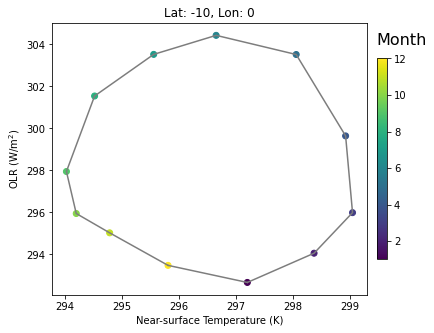

In [9]:
plot(-10,0)

In [10]:
get_height(-10, 0)

Average Hysteresis: 8.64 W m^-2


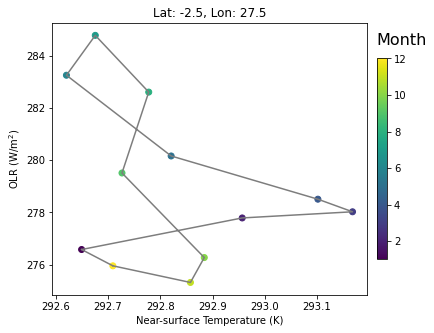

In [11]:
plot(-2.5, 27.5)

In [12]:
get_height(-2.5, 27.5)

Average Hysteresis: 2.16 W m^-2


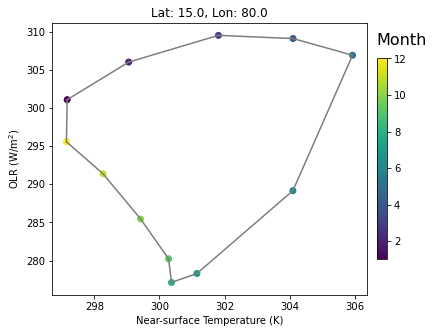

In [13]:
plot(15.0, 80.0)

In [14]:
get_height(15.0, 80.0)

Average Hysteresis: 19.38 W m^-2


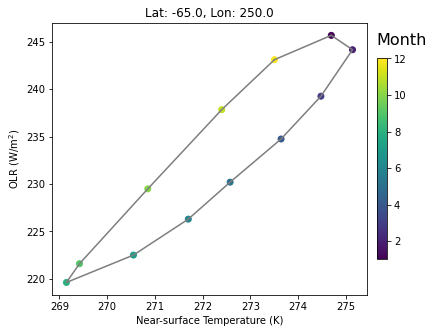

In [15]:
plot(-65.0, 250.0)

In [16]:
get_height(-65.0, 250.0)

Average Hysteresis: 6.07 W m^-2


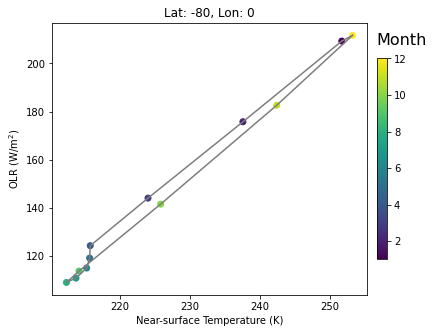

In [17]:
plot(-80, 0)

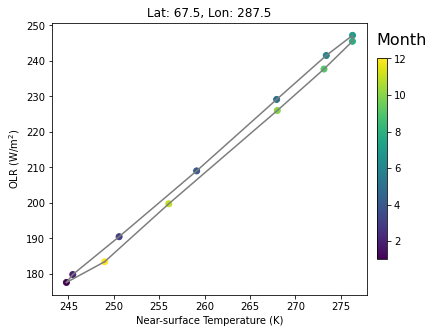

In [18]:
plot(67.5, 287.5)

### Plotting All Loops Together

A reproduction of Fig. 1, Koll and Cronin (2019)

In [19]:
def plot_knc():
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,9))
    
    month_list = np.arange(1,13)
    lc1 = '#7d7d7d'
    
    for i_raw in lats:
        for j_raw in lons:
            i = np.where(lats == i_raw)[0][0]
            j = np.where(lons == j_raw)[0][0]
            
            if i_raw > -88: # Messy results near antarctica
                cplot = axs.scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis', s=1)
            
            #axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=lc1, label='Calculated OLR')
            #axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c=lc1)
        
        progress(0) # Can you make this progress bar actually work?
        print(i_raw)
    
    axs.set_xlabel("Near-surface Temperature (K)")
    axs.set_ylabel("OLR (W/m$^2$)")
    
    #cbar = fig.colorbar(cplot, fraction=0.03,pad=0.03,shrink=1)
    #cbar.ax.set_title(r'Month',fontsize=16,y=1.04,x=2.5)
    
    cbar = fig.colorbar(cplot, fraction=0.03,pad=0.03,shrink=1, label='Month')

    
    #plt.savefig('./Figures/kandc full s1 big.png', bbox_inches='tight')

Progress: [--------------------] 0.0%
-90.0


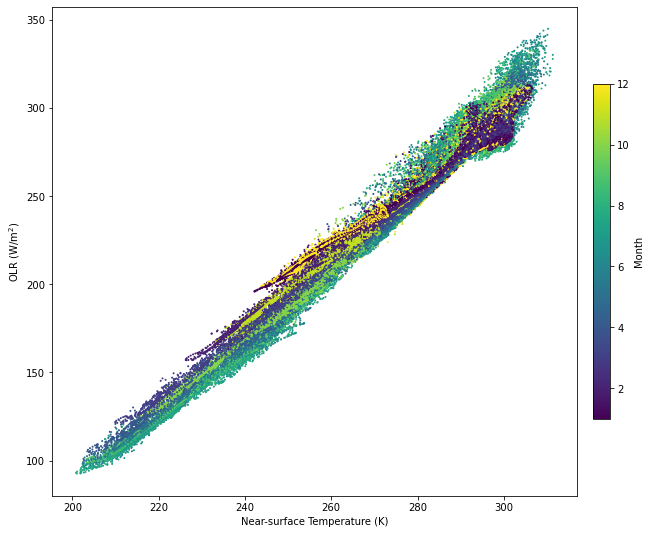

In [20]:
plot_knc() # removing everything beyond 88 S

### Plotting an Individual Loop Over All Loops

In [21]:
def plot_knc_donut(latval, lonval):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    
    month_list = np.arange(1,13)
    lc1 = '#7d7d7d'
    
    for i in month_list:
        mon_time = ts_2m.time.values[i-1]
        axs[0].scatter(ts_2m.sel(time=mon_time, lat=lats[:72]).air.values.flatten(),olrs_ltmm.sel(month=i, lat=lats[:72]).olr.values.flatten(),c=lc1, s=1)

    i_raw = latval
    j_raw = lonval
    
    axs[0].plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c='k', label='Calculated OLR')
    axs[0].plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c='k')
    cplot = axs[0].scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis', s=100)
    
    axs[0].set_xlabel("Near-surface Temperature (K)")
    axs[0].set_ylabel("OLR (W/m$^2$)")
    axs[0].set_title('Lat: %s, Lon: %s' % (latval, lonval))
    
    i_raw = latval
    j_raw = lonval

    axs[1].scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis', s=100)
    axs[1].plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=lc1, label='Calculated OLR')
    axs[1].plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c=lc1)
    
    axs[1].set_xlabel("Near-surface Temperature (K)")
    axs[1].set_ylabel("OLR (W/m$^2$)")
    axs[1].set_title('Lat: %s, Lon: %s' % (latval, lonval))
    axs[1].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
    
    cbar = fig.colorbar(cplot, fraction=0.03,pad=0.03,shrink=1, label='Month')
    
    #plt.savefig('./Figures/New K&C/kandc full s1 %s %s.png' % (latval, lonval), bbox_inches='tight')
    
    #plt.close()

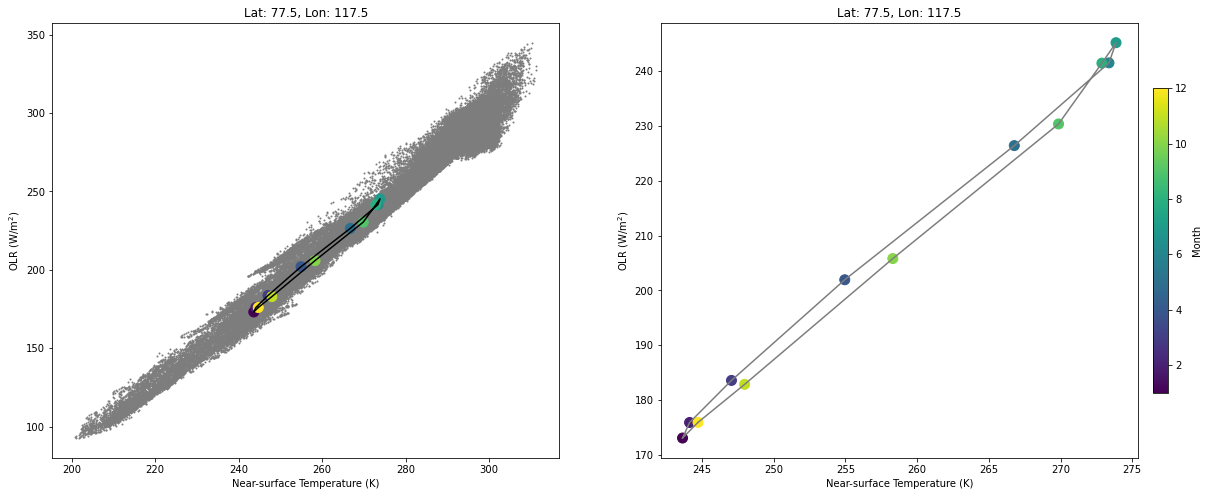

In [22]:
# plot for a single random location
plot_knc_donut(lats[np.random.randint(len(lats)-1)],lons[np.random.randint(len(lons))])

In [ ]:
# Plor for 100 random locations, which can then be turned into an animation
for i in range(100):
    plot_knc_donut(lats[np.random.randint(len(lats)-1)],lons[np.random.randint(len(lons))])

### Plotting Many Individual Loops Over All Loops

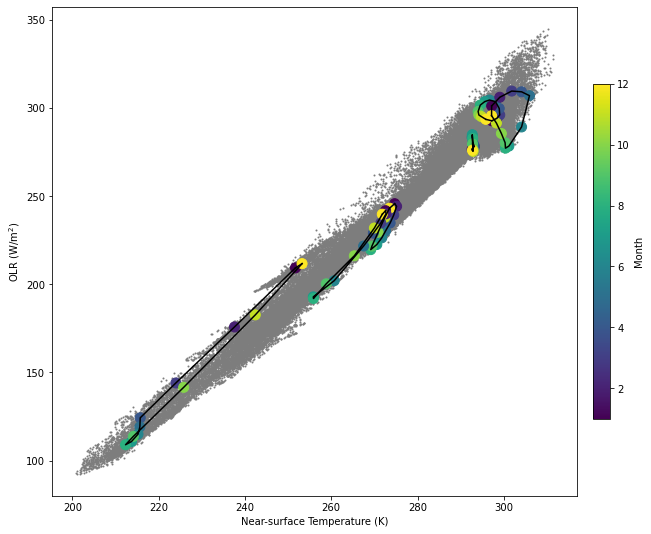

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,9))

month_list = np.arange(1,13)
lc1 = '#7d7d7d'

for i in month_list:
    mon_time = ts_2m.time.values[i-1]
    axs.scatter(ts_2m.sel(time=mon_time, lat=lats[:72]).air.values.flatten(),olrs_ltmm.sel(month=i, lat=lats[:72]).olr.values.flatten(),c=lc1, s=1)

latval = -2.5
lonval = 27.5
    
i_raw = latval
j_raw = lonval

axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c='k', label='Calculated OLR')
axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c='k')
cplot = axs.scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis', s=100)

latval = -10
lonval = 0
    
i_raw = latval
j_raw = lonval

axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c='k', label='Calculated OLR')
axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c='k')
cplot = axs.scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis', s=100)

latval = 15
lonval = 80
    
i_raw = latval
j_raw = lonval

axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c='k', label='Calculated OLR')
axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c='k')
cplot = axs.scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis', s=100)

latval = -65
lonval = 250
    
i_raw = latval
j_raw = lonval

axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c='k', label='Calculated OLR')
axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c='k')
cplot = axs.scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis', s=100)

latval = -80
lonval = 0
    
i_raw = latval
j_raw = lonval

axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c='k', label='Calculated OLR')
axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c='k')
cplot = axs.scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis', s=100)

latval = -67.5
lonval = 287.5
    
i_raw = latval
j_raw = lonval

axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c='k', label='Calculated OLR')
axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c='k')
cplot = axs.scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis', s=100)


axs.set_xlabel("Near-surface Temperature (K)")
axs.set_ylabel("OLR (W/m$^2$)")
#axs.set_title('Lat: %s, Lon: %s' % (latval, lonval))

cbar = fig.colorbar(cplot, fraction=0.03,pad=0.03,shrink=1, label='Month')

#plt.savefig('./Figures/KC Combo.png', bbox_inches='tight')

#plt.close()